In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
csv_paths = [
    "../local/log/2025/0224/asc拐弯车往东偏/tracking_control_node.csv",
]

LOG_SAVE_PATH = "./heading.csv.gz"

try:
    df_log = pd.concat([
        pd.read_csv(path, index_col=0).assign(log_index=i)
        for i, path in enumerate(csv_paths)
    ])
except FileNotFoundError:
    print("Some source log file is unavailable. Saved CSV will be read instead.")
    df_log = pd.read_csv(LOG_SAVE_PATH, index_col=0)
else:
    df_log.to_csv(LOG_SAVE_PATH, compression="gzip")
    print("Read from source log file(s) and generated concatenated CSV file.")

Read from source log file(s) and generated concatenated CSV file.


In [3]:
df_log_filtered = df_log.loc[
    (df_log["valid"] == 1)
    # & (df_log["imu_ready_status"] == 1)
    & np.isfinite(df_log["heading_gyroscope"])
    & np.isfinite(df_log["heading_two_antennas"])
]
len(df_log_filtered)

2476

In [4]:
HEADING_CONVERT_VALUE = 53.05

heading_gyroscope = df_log_filtered["heading_gyroscope"].to_numpy() \
    - np.deg2rad(HEADING_CONVERT_VALUE)
heading_transponder = df_log_filtered["heading_two_antennas"].to_numpy()

delta_heading = heading_transponder - heading_gyroscope
delta_heading = np.unwrap(delta_heading)

delta_heading.mean()

np.float64(0.9175848903154634)

Statistics of delta_heading_deg:
count    2476.000000
mean       52.573742
std         0.201286
min        51.583228
25%        52.482772
50%        52.562986
75%        52.694766
max        53.256265
dtype: float64


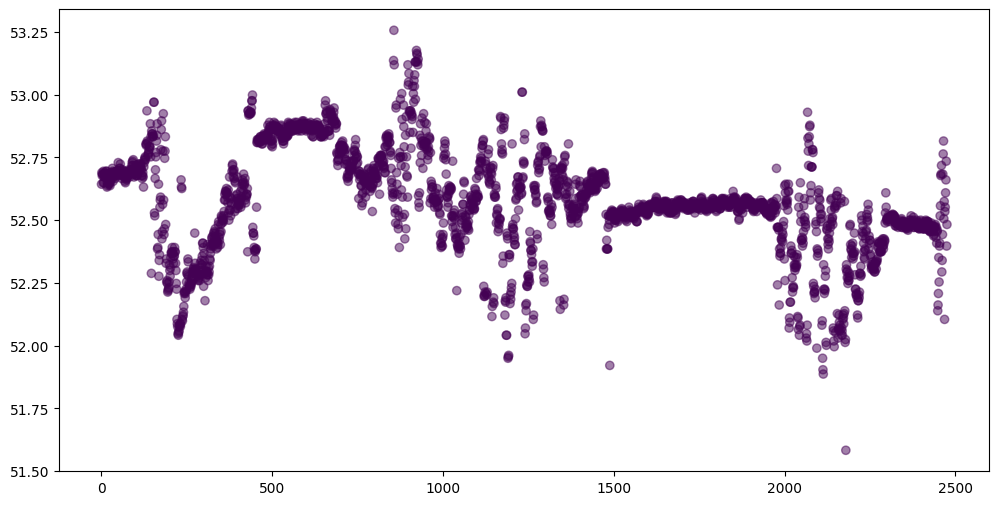

In [5]:
delta_heading_deg = np.rad2deg(delta_heading)

plt.figure(figsize=(12, 6))
plt.scatter(
    np.arange(len(delta_heading_deg)),
    delta_heading_deg,
    c=df_log_filtered["log_index"],
    alpha=0.5
)

print("Statistics of delta_heading_deg:")
print(pd.Series(delta_heading_deg).describe())